<a href="https://colab.research.google.com/github/loicmarx/datascience-projects/blob/main/hotel_cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the data
df = pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
def data_clean(df):
  df.fillna(0,inplace=True)
  print(df.isnull().sum())

In [ ]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
list = ['adults', 'children', 'babies']
for i in list:
  print('{} has a unique values as {}'.format(i,df[i].unique()))

adults has a unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has a unique values as [ 0.  1.  2. 10.  3.]
babies has a unique values as [ 0  1  2 10  9]


In [ ]:
# Try to remove the noise
# It is impossible that children , adults and babies are all equal to 0
filter = (df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [ ]:
# Remove the noisy data
data= df[~filter] # Negation of the filter so remove the noisy data

Problem statement:
1. From where location the guest are coming?

In [ ]:
# Determine from which country guest that cancelled are coming
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index() 

In [ ]:
country_wise_data

,index,country
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,GUY,1
162,BHS,1
163,BFA,1
164,SMR,1


In [ ]:
  # Change the columns name because they are shifted
  country_wise_data.columns=['country', 'No of guests']
  country_wise_data

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,GUY,1
162,BHS,1
163,BFA,1
164,SMR,1


In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
basemap= folium.Map()

In [ ]:
!pip install plotly

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import  plotly.express as px


In [ ]:
# Can use either HeatMap or choropleth map 
map_guest= px.choropleth(country_wise_data,
              locations=country_wise_data['country'],
              color=country_wise_data['No of guests'],
              hover_name=country_wise_data['country'],
              title='Home country of guests')
map_guest.show()

Problem 2 : How much per night guest pay?

In [ ]:
data2 = data[data['is_canceled']==0] #need a price distribution of each of room type

In [ ]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

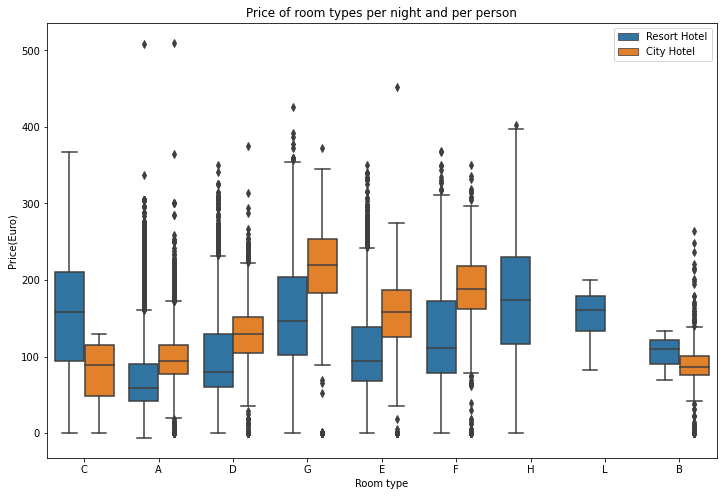

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data2) # adr is price, hue: we want the distribution both for the hotel
plt.title('Price of room types per night and per person')
plt.xlabel('Room type')
plt.ylabel('Price(Euro)')
plt.legend()
plt.show()

Problem Statement: 
1. How does the price vary by night 

In [ ]:
data_resort = data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index() #reset_index() to build a dataframe
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [ ]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index() #reset_index() to build a dataframe
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [ ]:
# We have 2 tables with 1 column in common so let's buid a common dataframe
final = resort_hotel.merge(city_hotel, on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [ ]:
 # Need to sort the Month columns
 !pip install sort-dataframeby-monthorweek

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=fd696cdf9b27bdc85d46bb14995064a23bcc57290dac4bd2a5561c72d8c6ffee
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek


In [ ]:
!pip install sorted-months-weekdays

  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=62cc4fc09b6113a5efcb5411a0d28ccb5063ff4b2b831d7dc69d805cbc19d7ed
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

In [ ]:
def sort_data(df, colname):
  return sd.Sort_Dataframeby_Month(df, colname)


In [ ]:
final = sort_data(final,'month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [ ]:
final.columns

Index(['month', 'price_for_resort', 'price_for_city_hotel'], dtype='object')

In [ ]:
final['price_for_resort']

0      48.761125
1      54.147478
2      57.056838
3      75.867816
4      76.657558
5     107.974850
6     150.122528
7     181.205892
8      96.416860
9      61.775449
10     48.706289
11     68.410104
Name: price_for_resort, dtype: float64

In [ ]:
final['price_for_city_hotel']

0      82.330983
1      86.520062
2      90.658533
3     111.962267
4     120.669827
5     117.874360
6     115.818019
7     118.674598
8     112.776582
9     102.004672
10     86.946592
11     88.401855
Name: price_for_city_hotel, dtype: float64

In [ ]:
# Lineplot
#px.line(final, x='month', y=(final['price_for_resort'],final['price_for_city_hotel']), title='Room price per night over the Months')



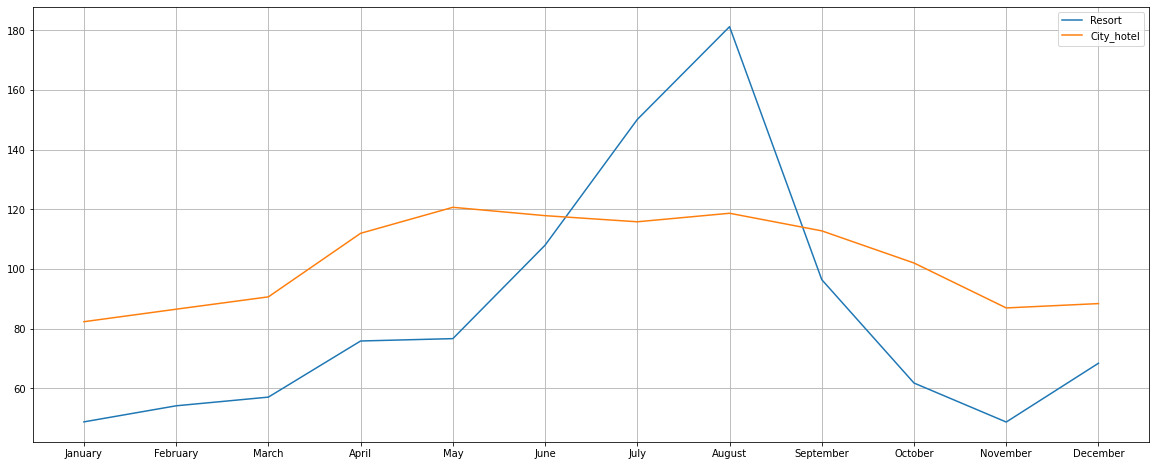

In [ ]:

plt.figure(figsize=(20,8))
plt.plot(final['month'],final['price_for_resort'],label='Resort')
plt.plot(final['month'],final['price_for_city_hotel'],label='City_hotel')
plt.grid(True)
plt.legend()

Problem statement:
1. Which are the most busy month or in which months Guest are high?
2. How long do people stay at the hostels ?  

In [ ]:
# Check the data resort
data_resort.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
#Count the number of arrival for the resort hotel
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month', 'no of guests'] # Shift the column name
rush_resort

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month', 'no of guests'] # Shift the column name
rush_city

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [ ]:
# Merge the 2 dataframe together
final_rush = rush_resort.merge(rush_city, on='month') # merge on the basis of month

In [ ]:
final_rush
final_rush.columns = ['month', 'no of guest in resort', 'no of guest in city hotel']
final_rush

,month,no of guest in resort,no of guest in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
final_rush = sort_data(final_rush, 'month')

In [ ]:
final_rush.columns

Index(['month', 'no of guest in resort', 'no of guest in city hotel'], dtype='object')

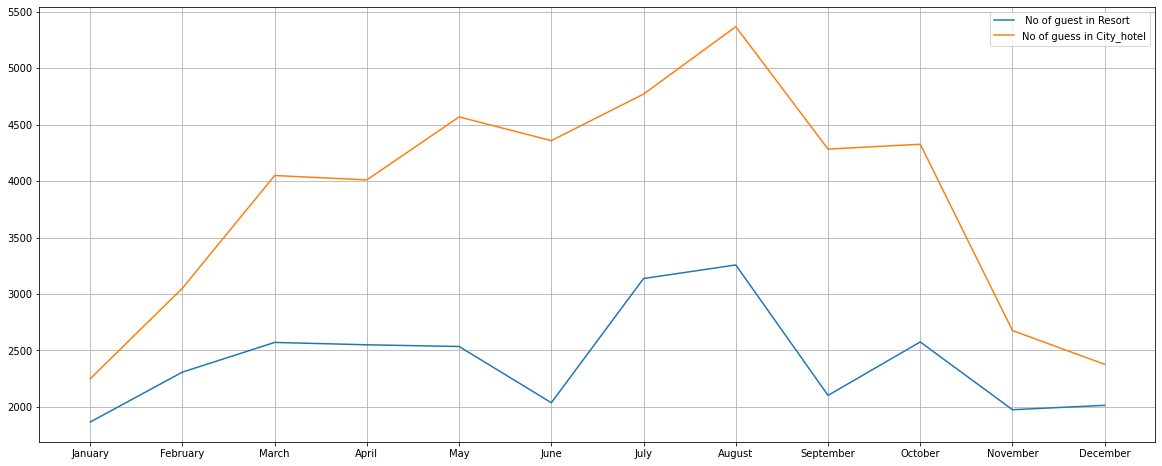

In [ ]:
# Need some trend so we plot
plt.figure(figsize=(20,8))
plt.plot(final_rush['month'],final_rush['no of guest in resort'],label=' No of guest in Resort')
plt.plot(final_rush['month'],final_rush['no of guest in city hotel'],label='No of guess in City_hotel')
plt.grid(True)
plt.legend()

Select important Features using Co-relation for Machine-learning

In [ ]:
#Check the data 
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
# Find correlation in the datable
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [ ]:
# We want only the data related to the cancelation
co_relation = data.corr()['is_canceled']
co_relation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

Based on this matrix, we can understand how each variable can impact the cancelation. 

In [ ]:
co_relation.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

From this matrix, we can say that lead_time, total_of_special_requests, required_car_parking_spaces are the most criteria that impact cancelation. 

In [ ]:
# Group data with the basis of 'is_canceled', reservation_status
data.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

We can go further and exclude some of the feature that are not relevent for the analysis.

In [ ]:
list_not = ['days_in_waiting_list', 'arrival_date_year']
num_features=[col for col in data.columns if data[col].dtype!='O' and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
# Same code as above in a different manner
cols = []
for col in data.columns:
  if data[col].dtype!='O' and col not in list_not:
    cols.append(col)
cols

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# exclude some irrelevent columns
cat_not=[ 'arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country', 'days_in_waiting_list']
cat_not

['arrival_date_year',
 'assigned_room_type',
 'booking_changes',
 'reservation_status',
 'country',
 'days_in_waiting_list']

In [ ]:
cat_features = [col for col in data.columns if data[col].dtype=='O' and col not in cat_not]
cat_features


['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']